## INF-578. Machine Learning. Tarea 2.
# Métodos Lineales para Clasificación

## Álvaro Salinas -  Camilo Valenzuela

## 17 de Noviembre de 2017

### Tabla de Contenidos

* [Librerías Necesarias](#libs)
* [Pregunta 1](#1)
    * [1.a](#1a)
    * [1.b](#1b)
    * [1.c](#1c)
    * [1.d](#1d)
    * [1.e](#1e)
    * [1.f](#1f)
    * [1.g](#1g)
    * [1.h](#1h)
    * [1.i](#1i)
* [Pregunta 2](#2)
    * [2.a](#2a)
    * [2.b](#2b)
    * [2.c](#2c)
    * [2.d](#2d)
    * [2.e](#2e)
    * [2.f](#2f)
    * [2.g](#2g)
* [Pregunta 3](#3)
    * [3.a](#3a)
    * [3.b](#3b)
    * [3.c](#3c)
    * [3.d](#3d)
    * [3.e](#3e)
    * [3.f](#3f)
    * [3.g](#3g)

<div id='libs' />
### Librerías necesarias

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

<div id='1' />
### 1. Reducción de Dimensionalidad para Clasificación

<div id='1a' />
##### (a) Construya un dataframe con los datos a analizar descargando los datos desde la URL. Determine cuántos registros contiene el conjunto de entrenamiento y cuántos el conjunto de pruebas. Determine además el número promedio de palabras por ítem en cada clase.

Este dataset esta compuesto por registros que representan la digitalización de señales producidas por speakers pronunciando vocales. Cada speaker pronuncia $6$ veces cada una de las $11$ vocales. De esta forma, el conjunto de entrenamiento, generado por los datos de $8$ speakers, contiene $6 \times 11 \times 8 = 528$ ejemplos, mientras el conjunto de prueba, con $7$ speakers, posee $6 \times 11 \times 7 = 462$ registros.

No se logra comprender la pregunta sobre el "número promedio de palabras por ítem en cada clase", dado que cada clase representa los parámetros log area relacionados a los coeficientes de reflexión que describen la señal de audio.

In [4]:
import urllib
import pandas as pd
train_data_url = "http://statweb.stanford.edu/~hastie/ElemStatLearn/datasets/vowel.train"
test_data_url = "http://statweb.stanford.edu/~hastie/ElemStatLearn/datasets/vowel.test"
train_data_f = urllib.urlretrieve(train_data_url, "train_data.csv")
test_data_f = urllib.urlretrieve(test_data_url, "test_data.csv")
train_df = pd.DataFrame.from_csv('train_data.csv',header=0,index_col=0)
test_df = pd.DataFrame.from_csv('test_data.csv',header=0,index_col=0)

In [5]:
train_df.tail()

,y,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10
row.names,,,,,,,,,,,
524,7,-4.065,2.876,-0.856,-0.221,-0.533,0.232,0.855,0.633,-1.452,0.272
525,8,-4.513,4.265,-1.477,-1.090,0.215,0.829,0.342,0.693,-0.601,-0.056
526,9,-4.651,4.246,-0.823,-0.831,0.666,0.546,-0.300,0.094,-1.343,0.185
527,10,-5.034,4.993,-1.633,-0.285,0.398,0.181,-0.211,-0.508,-0.283,0.304
528,11,-4.261,1.827,-0.482,-0.194,0.731,0.354,-0.478,0.050,-0.112,0.321


In [6]:
test_df.tail()

,y,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10
row.names,,,,,,,,,,,
458,7,-3.239,3.083,-1.427,-0.202,-0.282,1.421,0.576,0.068,-0.914,0.147
459,8,-3.753,3.605,-0.899,-0.747,-0.401,1.765,0.620,0.754,-0.835,-0.301
460,9,-3.980,2.459,0.068,0.023,0.237,1.029,-0.189,0.521,-0.773,-0.500
461,10,-4.264,2.925,0.065,0.794,0.323,0.515,-1.282,-0.140,-0.863,-0.390
462,11,-3.291,2.324,-0.679,0.285,0.441,0.557,-0.227,0.115,-1.046,0.697


<div id='1b' />
##### (b) Construya matrices $X$ e $y$ que contengan las características y las etiquetas correspondientes a los datos de entrenamiento y pruebas. Normalice apropiadamente los datos antes de empezar a trabajar.

In [7]:
from sklearn.preprocessing import StandardScaler
X = train_df.loc[:,'x.1':'x.10'].values
y = train_df.loc[:,'y'].values
Scaler = StandardScaler().fit(X)
X_std = Scaler.transform(X)

<div id='1c' />
##### (c) Utilizando PCA genere una representación en 2 dimensiones de la data original (10 dimensiones) identificando cada clase con un color distinto (elija una paleta apropiada).

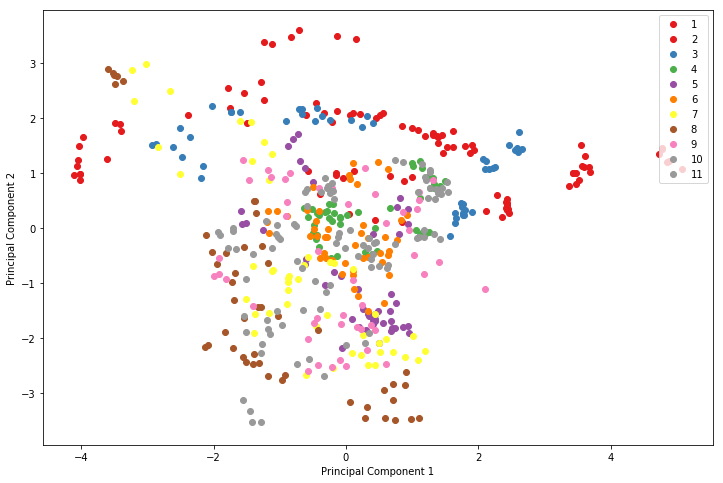

In [8]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
sklearn_pca = PCA(n_components=2)
Xred_pca = sklearn_pca.fit_transform(X_std)
cmap = plt.cm.get_cmap('Set1')
mclasses=(1,2,3,4,5,6,7,8,9,10,11)
mcolors = [cmap(i) for i in np.linspace(0,1,11)]
plt.figure(figsize=(12, 8))
for lab, col in zip(mclasses,mcolors):
    plt.scatter(Xred_pca[y==lab, 0],Xred_pca[y==lab, 1],label=lab,c=col)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
leg = plt.legend(loc='upper right', fancybox=True)
plt.show()

<div id='1d' />
##### (d) Utilizando LDA genere una representación en 2 dimensiones de la data original (10 dimensiones) identificando cada clase con un color distinto (elija una paleta apropiada).

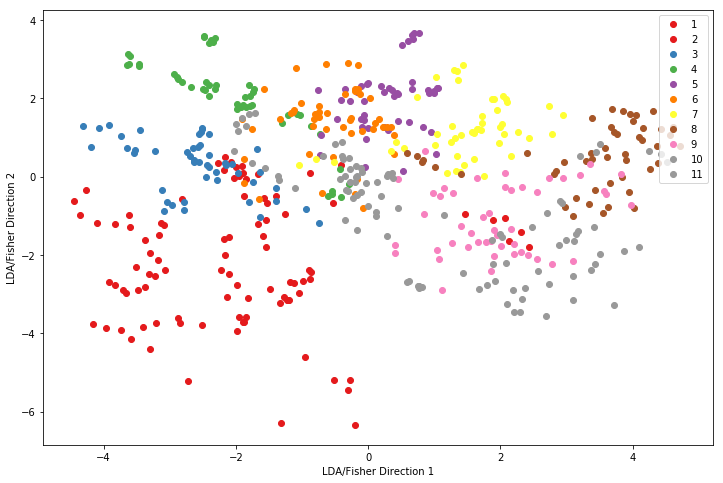

In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
sklearn_lda = LDA(n_components=2)
Xred_lda = sklearn_lda.fit_transform(X_std,y)
cmap = plt.cm.get_cmap('Set1')
mclasses=(1,2,3,4,5,6,7,8,9,10,11)
mcolors = [cmap(i) for i in np.linspace(0,1,11)]
plt.figure(figsize=(12, 8))
for lab, col in zip(mclasses,mcolors):
    plt.scatter(Xred_lda[y==lab, 0],Xred_lda[y==lab, 1],label=lab,c=col)
plt.xlabel('LDA/Fisher Direction 1')
plt.ylabel('LDA/Fisher Direction 2')
leg = plt.legend(loc='upper right', fancybox=True)
plt.show()

<div id='1e' />
##### (e) Compare cualitativamente los resultados obtenidos en c y d.

Es posible apreciar que el problema dimensionalmente reducido sigue siendo bastante complejo de abordar, pues las $2$ componentes mostradas tanto con PCA como con LDA presentan datos muy dispersos y linealmente no separables. De todas formas, se logra apreciar un mejor comportamiento en el caso de LDA, en donde las clases sí logran distinguirse de mejor manera, esto debido a que LDA si toma en cuenta el valor de las clases, mientras PCA trabaja únicamente sobre el espacio de características.

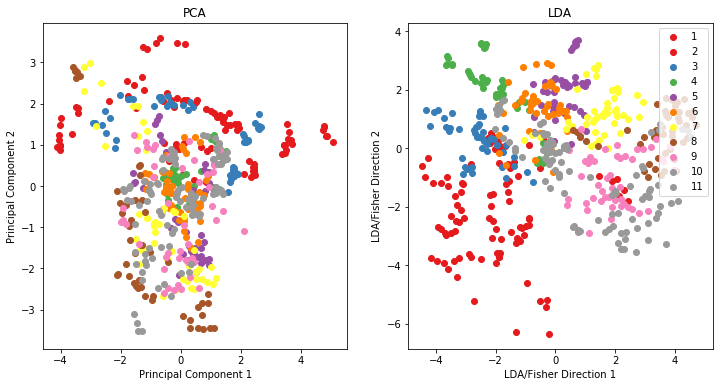

In [10]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
for lab, col in zip(mclasses,mcolors):
    ax1.scatter(Xred_pca[y==lab, 0],Xred_pca[y==lab, 1],label=lab,c=col)
ax1.set_xlabel('Principal Component 1')
ax1.set_ylabel('Principal Component 2')
ax1.set_title('PCA')
for lab, col in zip(mclasses,mcolors):
    ax2.scatter(Xred_lda[y==lab, 0],Xred_lda[y==lab, 1],label=lab,c=col)
ax2.set_xlabel('LDA/Fisher Direction 1')
ax2.set_ylabel('LDA/Fisher Direction 2')
ax2.set_title('LDA')
leg = plt.legend(loc='upper right', fancybox=True)
plt.show()

Como aporte, quisimos agregar un tercer método de reducción de dimensionalidad para problemas de clasificación. Este es un método bastante reciente (año 2008, a manos de L. van der Maaten y G. Hinton), y se denomina t-Distributed Stochastic Neighbor Embedding, o simplemente t-SNE. Ha demostrado ser bastante robusto ante una gran variedad de problemas y al probarlo con este dataset podemos ver como las clases se encuentran mucho más agrupadas, a pesar de que tampoco se presenta una separabilidad lineal clara.

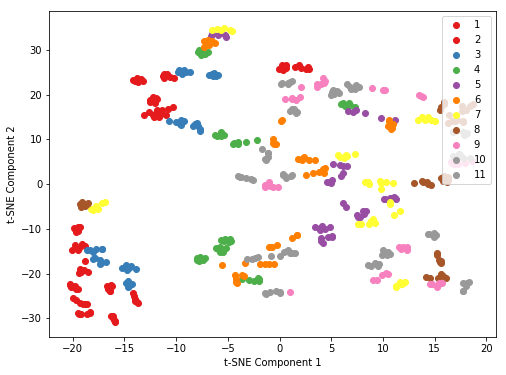

In [11]:
from sklearn.manifold import TSNE
X_tsne = TSNE(n_components=2,init='random').fit_transform(X_std)
cmap = plt.cm.get_cmap('Set1')
mclasses=(1,2,3,4,5,6,7,8,9,10,11)
mcolors = [cmap(i) for i in np.linspace(0,1,11)]
plt.figure(figsize=(8, 6))
for lab, col in zip(mclasses,mcolors):
    plt.scatter(X_tsne[y==lab, 0],X_tsne[y==lab, 1],label=lab,c=col)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
leg = plt.legend(loc='upper right', fancybox=True)
plt.show()

<div id='1f' />
##### (f) Construya un clasificador que determine la clase de un dato $x$ aleatoriamente sin considerar las características sino que solamente la probabilidad a-priori de cada clase. Por ejemplo, si la clase $y = 0$ ocurre el $25\%$ de las veces, su clasificador debe predecir esta clase para un determinado $x$ con probabilidad $0.25$, independiente de los atributos de $x$.

Para esto se recurrió a la función randint del módulo numpy.random. Esta función entrega un entero a partir de una distribución uniforme discreta, por lo que si este entero corresponde a un índice del array de clases, cada clase tendrá una probabilidad de ser seleccionada igual a su porcentaje de ocurrencia, como se pide en el enunciado.

De todas formas, esto se implementó pensando en un problema genérico, ya que en este caso particular, cada clase aparece $48$ veces en el conjunto de entrenamiento. Teniendo todas las clases la misma probabilidad de $\frac{1}{11}$, bastaría con elegir aleatoriamente una de ellas.

In [12]:
def Random_Classifier(y):
    label_index = np.random.randint(len(y))
    return y[label_index]

<div id='1g' />
##### (g) Compare el desempeño de LDA, QDA y un modelo de Vecinos Más Cercanos ($k$-NN) sin reducir dimensionalidad. ¿Qué técnica se comporta mejor sobre el conjunto de entrenamiento? ¿Sobre el conjunto de pruebas? Describa, utilizando un gráfico, el efecto de cambiar el parámetro de $k$ en el tercer modelo.

Sobre el conjunto de entrenamiento, los mejores métodos fueron QDA (score $\approx 0.98863$) y $k$-NN con $k \in \{
1,\dots,5\}$ (scores $\approx \{1.0,1.0,0.99621,0.99053,0.98106\}$).

Para el conjunto de prueba, el mejor método fue $k$-NN, que fue el único en alcanzar un score sobre $0.5$. Específicamente, el mejor fue $k = 7$, obteniendo un score cercano a $0.51948$.

-----LDA-----
0.683712121212
0.443722943723
-----QDA-----
0.988636363636
0.471861471861
-----KNN-----


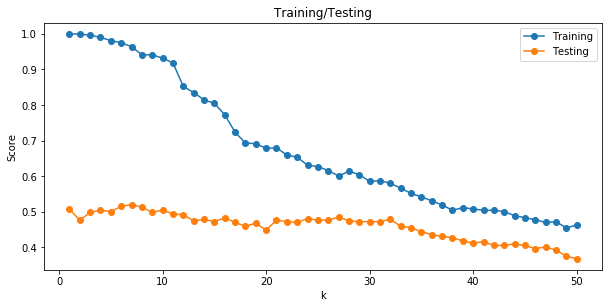

In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
Xtest = test_df.loc[:,'x.1':'x.10'].values
ytest = test_df.loc[:,'y'].values
X_std_test = Scaler.transform(Xtest)
lda_model = LDA()
lda_model.fit(X_std,y)
print "-----LDA-----"
print lda_model.score(X_std,y)
print lda_model.score(X_std_test,ytest)
qda_model = QDA()
qda_model.fit(X_std,y)
print "-----QDA-----"
print qda_model.score(X_std,y)
print qda_model.score(X_std_test,ytest)
print "-----KNN-----"
knn_scores_training = []
knn_scores_testing = []
k = range(1,51)
for c in k:
    knn_model = KNeighborsClassifier(n_neighbors=c)
    knn_model.fit(X_std,y)
    knn_scores_training.append(knn_model.score(X_std,y))
    knn_scores_testing.append(knn_model.score(X_std_test,ytest))
plt.figure(figsize=(10,10))
plt.subplot(211)
plt.xlabel("k")
plt.ylabel("Score")
plt.title("Training/Testing")
plt.plot(k,knn_scores_training, '-o',k,knn_scores_testing, '-o')
plt.legend(("Training", "Testing"), loc = "upper right")
plt.show()

<div id='1h' />
##### (h) Utilice PCA para generar una representación de la data en $d' = 1, 2, 3, \dots , 10$ dimensiones. Para cada caso entrene un modelo LDA, QDA y de $k$-NN. Construya un gráfico que muestre cómo evoluciona el error de entrenamiento versus $d'$. Sobreponga a este gráfico el error de pruebas versus $d'$. Concluya.

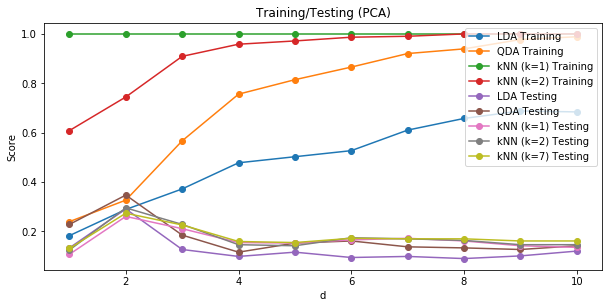

In [14]:
LDAtr,QDAtr,kNN1tr,kNN2tr,kNN7tr = [],[],[],[],[]
LDAte,QDAte,kNN1te,kNN2te,kNN7te = [],[],[],[],[]
for i in range(1,11):
    sklearn_pca = PCA(n_components=i)
    X_pca = sklearn_pca.fit_transform(X_std)
    X_pca_test = sklearn_pca.fit_transform(X_std_test)
    lda_model = LDA()
    lda_model.fit(X_pca,y)
    LDAtr.append(lda_model.score(X_pca,y))
    LDAte.append(lda_model.score(X_pca_test,ytest))
    qda_model = QDA()
    qda_model.fit(X_pca,y)
    QDAtr.append(qda_model.score(X_pca,y))
    QDAte.append(qda_model.score(X_pca_test,ytest))
    knn_scores_training = []
    knn_scores_testing = []
    for c in [1,2,7]:
        knn_model = KNeighborsClassifier(n_neighbors=c)
        knn_model.fit(X_pca,y)
        knn_scores_training.append(knn_model.score(X_pca,y))
        knn_scores_testing.append(knn_model.score(X_pca_test,ytest))
    kNN1tr.append(knn_scores_training[0])
    kNN2tr.append(knn_scores_training[1])
    kNN7tr.append(knn_scores_training[2])
    kNN1te.append(knn_scores_testing[0])
    kNN2te.append(knn_scores_testing[1])
    kNN7te.append(knn_scores_testing[2])
plt.figure(figsize=(10,10))
plt.subplot(211)
plt.xlabel("d")
plt.ylabel("Score")
plt.title("Training/Testing (PCA)")
plt.plot(range(1,11),LDAtr, '-o', label="LDA Training")
plt.plot(range(1,11),QDAtr, '-o', label="QDA Training")
plt.plot(range(1,11),kNN1tr, '-o', label="kNN (k=1) Training")
plt.plot(range(1,11),kNN2tr, '-o', label="kNN (k=2) Training")
plt.plot(range(1,11),LDAte, '-o', label="LDA Testing")
plt.plot(range(1,11),QDAte, '-o', label="QDA Testing")
plt.plot(range(1,11),kNN1te, '-o', label="kNN (k=1) Testing")
plt.plot(range(1,11),kNN2te, '-o', label="kNN (k=2) Testing")
plt.plot(range(1,11),kNN7te, '-o', label="kNN (k=7) Testing")
plt.legend(loc = "upper right")
plt.show()

<div id='1i' />
##### (i) Utilice LDA para generar una representación de la data en $d' = 1, 2, 3, \dots , 10$ dimensiones. Para cada caso entrene un modelo LDA, QDA y de $k$-NN. Construya un gráfico que muestre cómo evoluciona el error de entrenamiento versus $d'$. Sobreponga a este gráfico el error de pruebas versus $d'$. Concluya.

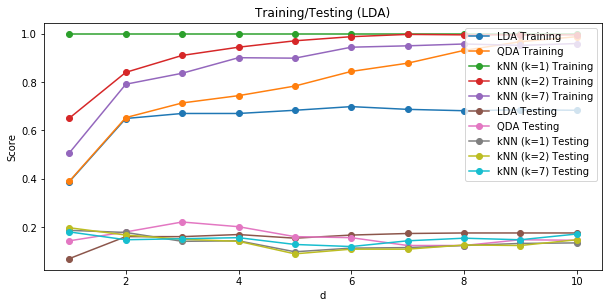

In [15]:
LDAtr,QDAtr,kNN1tr,kNN2tr,kNN7tr = [],[],[],[],[]
LDAte,QDAte,kNN1te,kNN2te,kNN7te = [],[],[],[],[]
for i in range(1,11):
    sklearn_lda = LDA(n_components=i)
    X_lda = sklearn_lda.fit_transform(X_std,y)
    X_lda_test = sklearn_lda.fit_transform(X_std_test,ytest)
    lda_model = LDA()
    lda_model.fit(X_lda,y)
    LDAtr.append(lda_model.score(X_lda,y))
    LDAte.append(lda_model.score(X_lda_test,ytest))
    qda_model = QDA()
    qda_model.fit(X_lda,y)
    QDAtr.append(qda_model.score(X_lda,y))
    QDAte.append(qda_model.score(X_lda_test,ytest))
    knn_scores_training = []
    knn_scores_testing = []
    for c in [1,2,7]:
        knn_model = KNeighborsClassifier(n_neighbors=c)
        knn_model.fit(X_lda,y)
        knn_scores_training.append(knn_model.score(X_lda,y))
        knn_scores_testing.append(knn_model.score(X_lda_test,ytest))
    kNN1tr.append(knn_scores_training[0])
    kNN2tr.append(knn_scores_training[1])
    kNN7tr.append(knn_scores_training[2])
    kNN1te.append(knn_scores_testing[0])
    kNN2te.append(knn_scores_testing[1])
    kNN7te.append(knn_scores_testing[2])
plt.figure(figsize=(10,10))
plt.subplot(211)
plt.xlabel("d")
plt.ylabel("Score")
plt.title("Training/Testing (LDA)")
plt.plot(range(1,11),LDAtr, '-o', label="LDA Training")
plt.plot(range(1,11),QDAtr, '-o', label="QDA Training")
plt.plot(range(1,11),kNN1tr, '-o', label="kNN (k=1) Training")
plt.plot(range(1,11),kNN2tr, '-o', label="kNN (k=2) Training")
plt.plot(range(1,11),kNN7tr, '-o', label="kNN (k=7) Training")
plt.plot(range(1,11),LDAte, '-o', label="LDA Testing")
plt.plot(range(1,11),QDAte, '-o', label="QDA Testing")
plt.plot(range(1,11),kNN1te, '-o', label="kNN (k=1) Testing")
plt.plot(range(1,11),kNN2te, '-o', label="kNN (k=2) Testing")
plt.plot(range(1,11),kNN7te, '-o', label="kNN (k=7) Testing")
plt.legend(loc = "upper right")
plt.show()

<div id='2' />
### 2. Análisis de Opiniones sobre Películas

<div id='2a' />
##### (a) Construya un dataframe con los datos a analizar descargando los datos desde la URL local. Determine cuántos registros de cada clase contiene el conjunto de entrenamiento y cuántos el conjunto de pruebas.

In [16]:
import urllib
import pandas as pd
train_data_url = "http://www.inf.utfsm.cl/~jnancu/stanford-subset/polarity.train"
test_data_url = "http://www.inf.utfsm.cl/~jnancu/stanford-subset/polarity.dev"
train_data_f = urllib.urlretrieve(train_data_url, "train_data.csv")
test_data_f = urllib.urlretrieve(test_data_url, "test_data.csv")
ftr = open("train_data.csv", "r")
fts = open("test_data.csv", "r")
rows = [line.split(" ",1) for line in ftr.readlines()]
train_df = pd.DataFrame(rows, columns=['Sentiment','Text'])
train_df['Sentiment'] = pd.to_numeric(train_df['Sentiment'])
rows = [line.split(" ",1) for line in fts.readlines()]
test_df = pd.DataFrame(rows, columns=['Sentiment','Text'])
test_df['Sentiment'] = pd.to_numeric(test_df['Sentiment'])
print train_df.shape
print test_df.shape

(3554, 2)
(3554, 2)


<div id='2b' />
##### (b) Construya una función, denominada word_extractor, que devuelva una lista de las palabras contenidas en un determinado un trozo de texto. Incorpore en su función las operaciones de lower-casing y stemming. Pruebe la función con las frases sugeridas en el código, invente otras similares y comente. Compare con los resultados obtenidos si no se hace stemming.

In [17]:
import re, time
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer, word_tokenize
from nltk.stem.porter import PorterStemmer
def word_extractor(text):
    ps = PorterStemmer()
    commonwords = stopwords.words('english')
    commonwords.remove("not")
    text = re.sub(r'([a-z])\1+', r'\1\1',text)
    words = ""
    wordtokens = [ ps.stem(word.lower()) for word in word_tokenize(text.decode('utf-8', 'ignore')) ]
    for word in wordtokens:
        if word not in commonwords:
            words+=" "+word
    return words
print word_extractor("I love to eat cake")
print word_extractor("I love eating cake")
print word_extractor("I loved eating the cake")
print word_extractor("I do not love eating cake")
print word_extractor("I don't love eating cake")

 love eat cake
 love eat cake
 love eat cake
 not love eat cake
 n't love eat cake


<div id='2c' />
##### (c) Construya una función, denominada word_extractor2, análoga a la función anterior, pero que lematice las palabras en vez de hacer stemming. Pruebe la función con las frases sugeridas en el código anterior y discuta las diferencias que observa.

In [18]:
def word_extractor2(text):
    wordlemmatizer = WordNetLemmatizer()
    commonwords = stopwords.words('english')
    commonwords.remove("not")
    text = re.sub(r'([a-z])\1+', r'\1\1',text)
    words = ""
    wordtokens = [ wordlemmatizer.lemmatize(word.lower()) for word in word_tokenize(text.decode('utf-8','ignore')) ]
    for word in wordtokens:
        if word not in commonwords:
            words+=" "+word
    return words

<div id='2d' />
##### (d) Utilizando la función CountVectorizer de la librería sklearn y de acuerdo a las directrices mencionadas en la introducción, genere una representación vectorial del texto de entrenamiento y del conjunto que usaremos para realizar pruebas. Explore el vocabulario utilizado y determine cuáles son las palabras más frecuentes en el conjunto de entrenamiento y pruebas.

In [19]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
texts_train = [word_extractor2(text) for text in train_df.Text]
texts_test = [word_extractor2(text) for text in test_df.Text]
vectorizer = CountVectorizer(ngram_range=(1, 1), binary='False')
vectorizer.fit(np.asarray(texts_train))
features_train = vectorizer.transform(texts_train)
features_test = vectorizer.transform(texts_test)
labels_train = np.asarray((train_df.Sentiment.astype(float)+1)/2.0)
labels_test = np.asarray((test_df.Sentiment.astype(float)+1)/2.0)
vocab = vectorizer.get_feature_names()
dist=list(np.array(features_train.sum(axis=0)).reshape(-1,))
for tag, count in zip(vocab, dist):
    print count, tag

6 10
4 100
2 101
1 105
2 10th
4 11
2 110
1 11th
1 12
2 13
1 13th
1 14
1 140
1 146
3 15
1 16
1 163
2 170
1 18th
4 19
2 1915
1 1934
1 1938
1 1940s
2 1950
1 1950s
1 1954
1 1955
1 1958
1 1959
2 1960s
1 1967
1 1972
3 1975
1 1978
1 1979
2 1980
1 1991
1 1992
2 1995
3 19th
4 20
2 2000
7 2002
4 20th
2 21st
1 22
1 24
2 25
1 25s
2 30
1 300
2 3000
1 30s
1 37
1 3d
5 40
1 400
1 401
1 40s
1 451
1 48
1 49
4 4ever
3 50
2 51
1 53
1 5ths
2 60s
1 65
1 65th
4 70s
1 71
1 77
1 78
1 79
4 80
1 800
3 80s
2 84
2 85
1 88
1 8th
13 90
1 90s
1 93
1 94
2 95
1 96
1 97
2 99
1 aaliyah
2 abandon
1 abandono
1 abbass
1 abbreviated
1 abc
2 abel
1 abhorrent
1 abiding
11 ability
6 able
3 ably
1 aboul
3 above
1 abrahams
1 abrams
1 abrasive
2 abroad
1 abruptly
2 absolute
7 absolutely
1 absorb
1 absorbed
10 absorbing
1 absorption
5 abstract
2 absurd
3 absurdist
4 absurdity
1 absurdly
1 aburrido
4 abuse
1 abysmally
1 acabamos
1 academic
2 academy
7 accent
1 accentuating
2 accept
1 accepting
10 accessible
2 accident
1 accidental
1

1 brecht
1 breckin
4 breezy
1 breitbart
3 brendan
1 brew
2 brian
2 bride
2 bridge
2 bridget
2 brief
1 briefly
8 bright
2 brightly
1 brilhantismo
1 brilliance
12 brilliant
8 brilliantly
1 brim
2 brimming
9 bring
5 bringing
12 brings
1 brink
2 brio
1 brisk
1 brit
8 british
2 britney
6 broad
1 broadside
2 broadway
1 broder
2 brogue
1 broiling
2 broke
5 broken
1 bromide
1 brooding
3 brooklyn
2 broomfield
1 bros
1 brosnan
9 brother
1 brothers
5 brought
2 brown
3 bruce
2 bruckheimer
1 bruising
1 brunt
2 brush
1 brushed
6 brutal
1 brutality
4 brutally
1 bryan
2 bubble
1 bubbly
1 bucket
2 budding
6 buddy
13 budget
1 bueller
4 buff
1 buffeted
1 buffoon
1 buffoonery
1 buggy
1 bui
10 build
2 building
5 built
1 bull
3 bullet
1 bullfighter
5 bullock
1 bullwinkle
1 bumbling
1 bump
1 bumper
5 bunch
1 bundy
2 buoyant
1 burdette
3 burger
3 buried
2 burke
5 burn
1 burnt
2 burr
2 burst
1 burstein
1 bursting
2 bus
1 buscemi
1 bush
8 business
2 bust
1 busting
1 bustling
3 busy
1 butler
1 butt
1 butterfinge

3 el
3 elaborate
1 elaborateness
1 elan
2 elbow
1 elder
1 elect
1 election
1 electric
1 electrocute
1 electronic
3 elegance
4 elegant
1 elegante
3 elegantly
1 elegiacally
1 elegy
9 element
1 elemental
1 elenco
1 elephant
1 elevate
3 elevates
1 elicit
1 elicited
1 elicits
1 elite
5 elizabeth
1 ellen
1 elli
3 elling
1 elliott
1 elliptical
1 elliptically
1 eloquence
1 eloquent
20 else
3 elsewhere
1 eludes
3 elusive
2 elvis
4 em
1 emailed
1 embarking
1 embarrassing
2 embarrassment
1 ember
1 embodies
7 embrace
1 embracing
2 emerge
3 emerges
2 emerging
1 emi
2 eminently
1 emocionalmente
13 emotion
22 emotional
18 emotionally
1 empathetic
4 empathy
2 emperor
1 emphasis
1 emphasising
4 emphasizes
1 emphasizing
4 empire
3 employ
2 empowerment
1 emptiness
6 empty
1 emptying
1 en
1 enact
1 enacted
1 enchanted
2 enchantment
1 encompasses
5 encounter
1 encountered
1 encountering
2 encourage
1 encouraging
60 end
3 endearing
3 endeavor
3 ended
1 endemic
1 endgame
22 ending
3 endless
3 endlessly
2 end

1 ingeniously
1 ingenue
4 ingredient
5 inherent
1 inherently
1 inhospitability
2 initial
2 initially
1 initiation
1 injected
2 injury
1 injustice
1 ink
1 inmate
7 inner
1 inning
4 innocence
1 innocuous
2 innovation
3 innovative
4 inoffensive
1 inquisitive
2 insane
1 insanely
1 insanity
1 inscrutable
2 insecure
1 insensitivity
7 inside
3 insider
14 insight
7 insightful
3 insightfully
2 insignificance
3 insipid
1 insisted
2 insistently
3 insomnia
1 inspection
1 inspiration
1 inspirational
5 inspire
10 inspired
2 inspires
8 inspiring
3 installment
1 instance
4 instantly
30 instead
4 instinct
1 instruct
1 instructive
1 insufferably
1 insufficiently
1 insult
3 insulting
1 insurance
1 intacto
2 integrated
1 integrates
1 integrating
2 integrity
3 intellect
9 intellectual
11 intelligence
23 intelligent
8 intended
1 intends
6 intense
2 intensely
3 intensity
2 intent
5 intention
2 intentionally
5 intentioned
2 inter
1 interacting
3 interaction
1 intercut
1 interesante
1 interesantes
19 interest


1 opium
1 opportunism
10 opportunity
1 opposing
1 opposite
2 oppressive
2 oppressively
2 oprah
1 oprahfication
1 ops
1 optic
3 optimism
2 optimistic
1 option
1 opulent
1 or
1 oral
4 orange
2 orchard
1 orchestrating
2 ordeal
7 order
5 ordinary
2 organic
1 organized
1 orgasm
1 orgy
4 oriented
28 original
10 originality
1 originally
1 orlando
17 oscar
1 oscura
1 ostensible
1 otherness
13 others
15 otherwise
1 otherworldly
3 ought
2 ounce
1 ouro
14 out
3 outburst
1 outcast
4 outer
1 outgag
3 outing
1 outnumber
1 outr
1 outrage
1 outraged
4 outrageous
2 outright
1 outs
1 outselling
2 outshine
5 outside
1 outsider
1 outstanding
1 outta
1 outtake
1 outward
1 outweigh
1 outweighs
10 over
1 overacted
14 overall
2 overbearing
1 overblown
1 overburdened
7 overcome
2 overcomes
1 overcook
1 overdoses
1 overdue
1 overhearing
2 overheated
1 overindulgence
1 overinflated
2 overlong
7 overly
1 overplay
1 overpraised
1 override
1 overripe
1 oversexed
2 overshadowed
1 overshadows
1 oversize
1 oversized
2

1 sibling
4 sick
1 sickeningly
1 sickly
12 side
1 sidedness
1 sidey
1 siege
1 siegel
1 siempre
1 sieve
6 sight
7 sign
1 signal
4 significant
2 significantly
2 signpost
2 silberling
1 silberstein
1 silence
2 silent
3 silliness
21 silly
2 silver
4 similar
1 simon
2 simone
18 simple
1 simplest
5 simplicity
6 simplistic
25 simply
2 simpson
1 simulation
4 simultaneously
3 sin
1 sinai
32 since
7 sincere
2 sing
1 singer
3 singing
17 single
1 sings
1 singular
1 sinister
3 sink
1 sinner
1 siren
1 sirk
4 sister
2 sisterhood
12 sit
2 sitcom
1 sitcomishly
1 sits
7 sitting
17 situation
1 six
1 sixed
1 sixth
1 sixties
1 size
4 sized
2 sizzle
2 skate
1 skateboard
1 skateboarder
1 skating
1 skeleton
1 skeptic
4 sketch
1 sketchbook
1 sketched
2 sketchy
1 skewed
1 skewering
1 skid
1 skilfully
9 skill
1 skillful
1 skillfully
1 skim
1 skimpy
9 skin
1 skinner
3 skip
1 skit
1 skullduggery
1 skunk
2 sky
1 sl2
1 slack
1 slackers
1 slain
1 slam
1 slanted
3 slap
1 slapdash
1 slapping
7 slapstick
2 slash
5 slash

8 ultimate
44 ultimately
1 ultra
1 ultraviolent
4 um
1 uma
2 un
5 una
1 unabashed
4 unabashedly
3 unable
1 unaccountable
1 unamusing
1 unanswered
1 unapologetic
2 unapologetically
2 unashamedly
2 unassuming
1 unattractive
1 unaware
1 unbalanced
3 unbearable
1 unbearably
2 unbelievably
1 unblinking
1 unbridled
3 uncanny
1 unceasing
2 uncertain
1 uncertainty
1 uncinematic
1 unclassifiably
1 uncle
1 unclean
1 unclear
1 uncluttered
1 uncomfortable
4 uncomfortably
2 uncommonly
1 uncompelling
4 uncompromising
1 unconnected
1 uncontrolled
1 unconventionally
5 unconvincing
1 uncoordinated
1 undead
1 undemanding
1 undeniable
2 undeniably
2 under
1 underappreciated
1 underbelly
1 undercover
2 undercurrent
3 undercut
1 underdog
1 underdramatized
1 underestimate
1 underestimated
1 undergraduate
4 underlying
1 undermine
1 undermined
2 undermining
2 underneath
1 undernourished
9 understand
2 understandable
6 understanding
3 understands
4 understated
1 underventilated
2 underwear
1 undisputed
1 undis

<div id='2e' />
##### (e) Construya una función que evalúe el desempeño obtenido por un clasificador genérico en el conjunto de entrenamiento y en el conjunto de pruebas. Utilice y explique las métricas que calcula la función classification_report de la librería sklearn.

In [20]:
from sklearn.metrics import classification_report
def score_the_model(model,x,y,xt,yt,text):
    acc_tr = model.score(x,y)
    acc_test = model.score(xt[:-1],yt[:-1])
    print "Training Accuracy %s: %f"%(text,acc_tr)
    print "Test Accuracy %s: %f"%(text,acc_test)
    print "Detailed Analysis Testing Results ..."
    print(classification_report(yt, model.predict(xt), target_names=['+','-']))

<div id='2f' />
##### (f) Construya una función que entrene/ajuste un clasificador Bayesiano Ingenuo (Binario) (las características no nulas serán tratadas como 1) y mida el error de predicción obtenido sobre los datos de entrenamiento y pruebas. Utilice esta función con las características extraídas en el punto (d). Mida el efecto de filtrar stopwords y de eliminar este paso de pre-procesamiento típico. Determine además, qué representación obtiene un mejor resultado: si aquella obtenida vía lematización o aquella obtenida vía stemming. Finalmente, tome un subconjunto aleatorio de los textos de prueba y analice las predicciones del modelo (explore las predicciones, así como las probabilidades que el clasificador asigna a cada clase).

In [21]:
from sklearn.naive_bayes import BernoulliNB
import random
def do_NAIVE_BAYES(x,y,xt,yt):
    model = BernoulliNB()
    model = model.fit(x, y)
    score_the_model(model,x,y,xt,yt,"BernoulliNB")
    return model
model=do_NAIVE_BAYES(features_train,labels_train,features_test,labels_test)
test_pred = model.predict_proba(features_test)
spl = random.sample(xrange(len(test_pred)), 15)
for text, sentiment in zip(test_df.Text[spl], test_pred[spl]):
    print sentiment, text

Training Accuracy BernoulliNB: 0.958920
Test Accuracy BernoulliNB: 0.738249
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.75      0.73      0.74      1803
          -       0.73      0.75      0.74      1751

avg / total       0.74      0.74      0.74      3554

[ 0.32577667  0.67422333] a movie that harps on media-constructed 'issues' like whether compromise is the death of self� this orgasm [won't be an] exceedingly memorable one for most people .

[ 0.5638833  0.4361167] a much more successful translation than its most famous previous film adaptation , writer-director anthony friedman's similarly updated 1970 british production .

[ 0.96535421  0.03464579] it is supremely unfunny and unentertaining to watch middle-age and older men drink to excess , piss on trees , b . s . one another and put on a show in drag .

[ 0.01447858  0.98552142] this story still seems timely and important . and there's an element of heartbre

<div id='2g' />
##### (g) Construya una función que entrene/ajuste una Máquina de Vectores de Soporte (SVM) Lineal y mida el error de predicción obtenido sobre los datos de entrenamiento y pruebas. Incluya en su función la exploración de diferentes valores del parámetro de regularización C. Discuta el significado y efecto esperado de este parámetro. Utilice la función construida con los atributos extraídos en el punto (d). Mida el efecto de filtrar stopwords y de eliminar este paso de pre-procesamiento típico. Determine además, qué representación obtiene un mejor resultado: si aquella obtenida vía lematización o aquella obtenida vía stemming. Finalmente, tome un subconjunto aleatorio de los textos de prueba y analice las predicciones del modelo (explore las predicciones, así como las probabilidades que el clasificador asigna a cada clase).

In [22]:
from sklearn.svm import LinearSVC
def do_SVM(x,y,xt,yt):
    Cs = [0.01,0.1,10,100,1000]
    for C in Cs:
        print "C Value: %f"%C
        model = LinearSVC(C=C)
        model = model.fit(x, y)
        score_the_model(model,x,y,xt,yt,"SVM")
do_SVM(features_train,labels_train,features_test,labels_test)

C Value: 0.010000
Training Accuracy SVM: 0.886044
Test Accuracy SVM: 0.716296
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.72      0.72      0.72      1803
          -       0.71      0.71      0.71      1751

avg / total       0.72      0.72      0.72      3554

C Value: 0.100000
Training Accuracy SVM: 0.989871
Test Accuracy SVM: 0.724740
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.73      0.72      0.73      1803
          -       0.72      0.73      0.72      1751

avg / total       0.72      0.72      0.72      3554

C Value: 10.000000
Training Accuracy SVM: 1.000000
Test Accuracy SVM: 0.705038
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.72      0.69      0.70      1803
          -       0.69      0.72      0.71      1751

avg / total       0.71      0.71      0.71      3554

C Valu

<div id='3' />
###  3. Fraude en transacciones bancarias

<div id='3a' />
##### (a) Descargue y cargue el archivo, genere un gráfico que compare la cantidad de elementos que hay por clase.

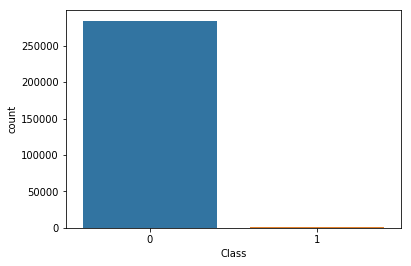

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
dt = pd.read_csv("creditcard.csv",header = 0)
sns.countplot("Class",data=dt)
plt.show()

In [24]:
perc = pd.DataFrame(dt.groupby("Class").count().iloc[:,0] / len(dt)) *100
perc.columns = ["Perc"]
perc

,Perc
Class,
0,99.827251
1,0.172749


<div id='3b' />
#####  (b) Estandarice el monto de la transacción. ¿Por qué solo estandarizamos un atributo?

In [25]:
dt.describe().iloc[:,[0,1,4,29]]

,Time,V1,V4,Amount
count,284807.000000,2.848070e+05,2.848070e+05,284807.000000
mean,94813.859575,3.919560e-15,2.782312e-15,88.349619
std,47488.145955,1.958696e+00,1.415869e+00,250.120109
min,0.000000,-5.640751e+01,-5.683171e+00,0.000000
25%,54201.500000,-9.203734e-01,-8.486401e-01,5.600000
50%,84692.000000,1.810880e-02,-1.984653e-02,22.000000
75%,139320.500000,1.315642e+00,7.433413e-01,77.165000
max,172792.000000,2.454930e+00,1.687534e+01,25691.160000


Por temas de confidencialidad el dataset que se tiene es el resultado de ocupar PCA sobre el dataset original, por lo que las columnas $V1$ a $V28$ son los valores de la data transformada. Como se puede observar en la tabla anterior las columnas $V1$ y $V4$ (en general todas las columnas transformadas) tienen media 0 y desviación estandar cercanas a 1, por lo que ya vienen normalizadas, esto debido a la transformación PCA utilizada.

En el caso de Amount y Time, estas columnas no vienen procesadas por lo que requieren ser procesadas antes de poder utilizarlas.

In [26]:
from sklearn.preprocessing import StandardScaler
dt["nAmount"] = StandardScaler().fit_transform(dt['Amount'].values.reshape(-1, 1))
dt.drop(["Time","Amount"],axis=1,inplace=True)
dt.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,nAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


La columna Time no será procesada tomando como supuesto independencia entre los distintos ejemplos.

<div id='3c' />
##### (c) Defina una función que reciba como input un modelo, los datos de entrenamiento y datos de testeo. Esta función deberá mostrar luego de generar el modelo y haber probado la data de testing una matriz de confusión, junto a sus respectivas métricas. Deberá además mostrar una curva ROC junto al valor del área bajo la curva de esta.
#### Finalmente, responda las siguientes preguntas
- ¿Qué es una matriz de confusión? 
- ¿Qué métricas se pueden calcular de ésta y cuáles nos serán útiles en este experimento? 
- ¿Qué es una curva ROC y qué relación tiene con la matriz de confusión?

In [27]:
from sklearn.metrics import roc_curve,roc_auc_score

def model(model,features_train,features_test,labels_train,labels_test):
    clf = model
    clf.fit(features_train,labels_train.values.ravel())
    pred=clf.predict(features_test)
    cnf_matrix=confusion_matrix(labels_test,pred)
    print "The recall for this model is: %f"%(float(cnf_matrix[1,1])/(cnf_matrix[1,1]+cnf_matrix[1,0]))
    fig= plt.figure(figsize=(6,3))
#     print "TP: %d"%cnf_matrix[1,1,]
#     print "TN: %d"%cnf_matrix[0,0]
#     print "FP: %d"%cnf_matrix[0,1]
#     print "FN: %d"%cnf_matrix[1,0]
    sns.heatmap(cnf_matrix,cmap="coolwarm_r",annot=True,linewidths=0.5)
    plt.title("Confusion_matrix")
    plt.xlabel("Predicted_class")
    plt.ylabel("Real class")
    plt.show()
    print "\n----------Classification Report------------------------------------"
    print classification_report(labels_test,pred)
    print "\n----------ROC Curve------------------------------------"
    
    fpr, tpr, _ = roc_curve(labels_test, pred)
    roc_auc = roc_auc_score(labels_test,pred)
    plt.figure()
    plt.title("ROC AUC {}".format(roc_auc))
    plt.plot(fpr,tpr, label="Modelo")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.legend(loc='best')
    plt.show()
    print "\n--------------------------------------------------------"

    return((float(cnf_matrix[1,1])/(cnf_matrix[1,1]+cnf_matrix[1,0])))

##### ¿Que es una matriz de confusión?
Es una herramienta para visualizar la predicción de un modelo de clasificación, cada columna de esta matriz representa la clase que el modelo predijo ($\hat{y}$) y las filas de la matriz son las clases reales.
Un modelo óptimo va a tener una matriz de confusión diagonal, porque la predicción es igual al valor real, entonces no se tienen falsos positivos ni falsos negativos que se encuentran en los valores que no están en la diagonal.

##### ¿Qué métricas se pueden calcular de ésta y cuáles nos serán útiles en este experimento? 


Las métricas que se calculan utilizando la matriz de confusión generalmente son utilizadas para problemas de clasificación con dos clases, existen generalizaciones para multiclase.

En el caso de un problema de clasificación binaria (dos clases) la matriz de confusión se divide en 4 sectores, Verdaderos Postivos (True Positive $TP$), Verdaderos Negativos (True Negative $TN$), Falsos Positivos ($FP$) y Falsos Negativos ($FN$)

![confusion_matrix](confusion_matrix.png "Confusion Matrix")

Lo que se busca es maximizar los TP y los TN disminuyendo la cantidad de FN y FP, para esto existen métricas que toman en cuenta distintas combinaciones de estos valores dandole mayor enfasis a distintas sectores de la matriz de confusión.

Las métricas más conocidas son
- Precision : $ \frac{tp}{tp+fp} $
- Recall: $\frac{tp}{tp+fn}$
- Accuracy: $\frac{tp+tn}{tp+tn+fp+fn}$

![precision_recall](Precisionrecall.svg "Precision and Recall")

Todas estas métricas entregan valores entre $[0,1]$, si el problema está balanceado el $Accuracy$ es una buena métrica ya que ambas clases tienen el mismo peso para la métrica, pero si el problema es desbalanceado es necesario ocupar alguna de las otras métricas ya que se centran sólo en las $TP$ y así da menor si la clase desbalanceada esta siendo mal clasificada.

Existen otras métricas que combinan las métricas anteriormente descritas para tomar en cuenta más sectores de la matriz de confusión, este es el caso del F-Score 
$$ F_{score} = 2 \cdot \frac{precision \cdot recall}{precision + recall} = \frac{2 \cdot TP}{2\cdot TP + FP + FN} $$
Esta métrica castiga en mayor medida cuando la clasificación es erronea.


##### ¿Qué es una curva ROC y qué relación tiene con la matriz de confusión?

Una curva ROC visualiza la sensibilidad del modelo que se está utilizando a medida que se agregan más ejemplos, por lo que la curva va visualizando el True Positives Ratio ($\frac{TP}{Positives}$) y False Positive Ratio ($\frac{FP}{Negatives}$).

Luego de obtener la curva ROC se puede calcular el área bajo esta curva, si el valor de área bajo la curva ROC (AUC) es igual a 1 se tiene un modelo óptimo y si es igual a 0.5 la predicción del modelo no es útil. 

![roc_curve](Curvas.png "Curva ROC")


<div id='3d' />
##### (d) Defina una función que genere un Training y Testing Set de un Dataset cualquiera. Indique qué está haciendo la función.

La función comienza con una Dataframe con $I+1$ columnas, donde $I$ es la cantidad de features y la última columna es la clase de cada ejemplo.

Luego este DataFrame se divide en las features $X$ y clases $y$, luego se utiliza la función `train_test_split` que divide de forma aleatoria los conjuntos $X$,$y$ en dos subconjuntos, uno de train y otro de test.

En este caso es importante que esta división sea estratificada ya que se tienen clases desbalanceadas, una division estratificada busca que los conjuntos resultantes tengan la misma distribución de clases que el conjunto original.

En específico la implementación `train_test_split` primero revisa si es un problema de clasificación, y si es así utiliza una división estratificada por defecto.

In [28]:
from sklearn.model_selection import train_test_split
def data_prepration(x):
    x_features= x.iloc[:,x.columns != "Class"]
    x_labels=x.iloc[:,x.columns=="Class"]
    x_train,x_test,y_train,y_test=train_test_split(x_features,x_labels,test_size=0.3)
    print "Length of training data: %d"%len(x_train)
    print "Length of test data: %d"%len(x_test)
    return(x_train,x_test,y_train,y_test)

<div id='3e' />
##### (e) Defina una función que realice Undersample. ¿Explique en que consiste esta técnica?

Undersampling busca balancear el problema reduciendo la cantidad de ejemplos de la clase mayoritaria, en el caso de la función implementada ésta realiza esta reducción de ejemplos de forma aleatoria.

Como la técnica de undersampling reduce la cantidad de ejemplos no es útil si se está utilizando modelos con gran cantidad de parámetros como las redes neuronales.

In [29]:
def undersample(data,times):
    fraud_indices= np.array(data[data.Class==1].index)
    normal_indices = np.array(data[data.Class==0].index)
    Count_Normal_transacation = len(data[data["Class"]==0])
    Count_Fraud_transacation = len(data[data["Class"]==1])
    Normal_indices_undersample = np.array(np.random.choice(normal_indices,(times*Count_Fraud_transacation),replace=False))
    undersample_data= np.concatenate([fraud_indices,Normal_indices_undersample])
    undersample_data = data.iloc[undersample_data,:]
    normal = (float(len(undersample_data[undersample_data.Class==0]))/len(undersample_data["Class"]))
    print "The normal transacation proportion is : %f"%normal
    fraud = (float(len(undersample_data[undersample_data.Class==1]))/len(undersample_data["Class"]))
    print "The fraud transacation proportion is : %f"%fraud
    return(undersample_data)

<div id='3f' />
##### (f) Genere un modelo de Logistic Regression y otro a su elección utilizando UnderSample. Concluya a partir de los resultados.

Además de Logistis Regression se utilizó Decision Tree, el primero es un modelo parámetrico y el segundo uno no parḿetrico.

Length of training data: 199364
Length of test data: 85443


# The undersample data for 1 proportion


The normal transacation proportion is : 0.500000
The fraud transacation proportion is : 0.500000


## ----------------------Logistic Regression------------------------

### ----------------------Validation Set------------------------

### The model classification for 1 proportion


Length of training data: 460
Length of test data: 198
The recall for this model is: 0.871287


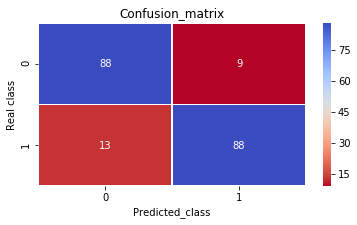


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.87      0.91      0.89        97
          1       0.91      0.87      0.89       101

avg / total       0.89      0.89      0.89       198


----------ROC Curve------------------------------------


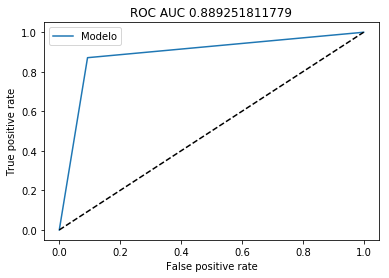


--------------------------------------------------------


### --------------------------Testing Set---------------------------

The recall for this model is: 0.889571


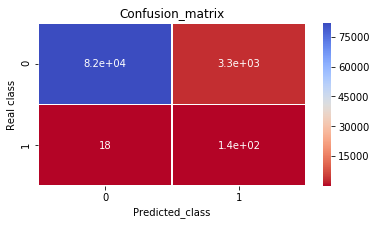


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      0.96      0.98     85280
          1       0.04      0.89      0.08       163

avg / total       1.00      0.96      0.98     85443


----------ROC Curve------------------------------------


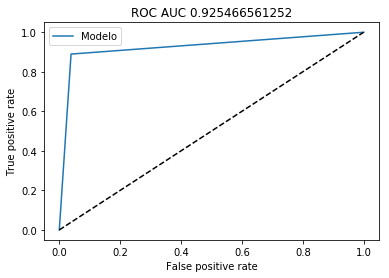


--------------------------------------------------------


### ---------------------------------------------------------------

## ----------------------Decision Tree ------------------------

### ----------------------Validation Set------------------------

### The model classification for 1 proportion


Length of training data: 460
Length of test data: 198
The recall for this model is: 0.896907


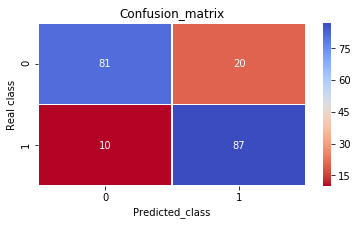


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.89      0.80      0.84       101
          1       0.81      0.90      0.85        97

avg / total       0.85      0.85      0.85       198


----------ROC Curve------------------------------------


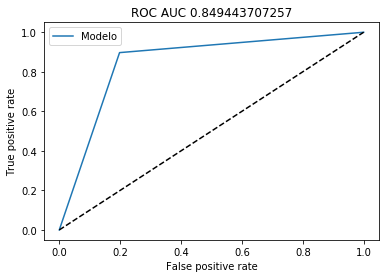


--------------------------------------------------------


### --------------------------Testing Set---------------------------

The recall for this model is: 0.877301


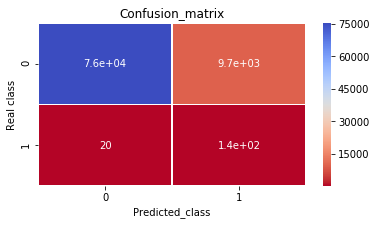


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      0.89      0.94     85280
          1       0.01      0.88      0.03       163

avg / total       1.00      0.89      0.94     85443


----------ROC Curve------------------------------------


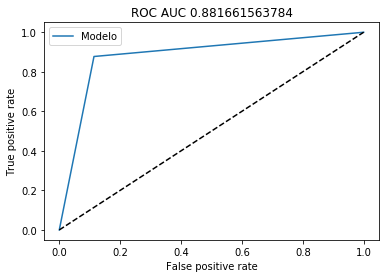


--------------------------------------------------------


### ---------------------------------------------------------------

# The undersample data for 2 proportion


The normal transacation proportion is : 0.666667
The fraud transacation proportion is : 0.333333


## ----------------------Logistic Regression------------------------

### ----------------------Validation Set------------------------

### The model classification for 2 proportion


Length of training data: 690
Length of test data: 297
The recall for this model is: 0.882353


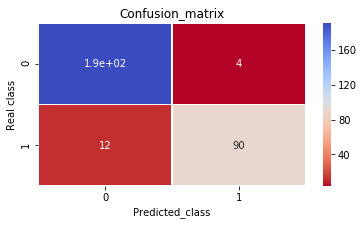


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.94      0.98      0.96       195
          1       0.96      0.88      0.92       102

avg / total       0.95      0.95      0.95       297


----------ROC Curve------------------------------------


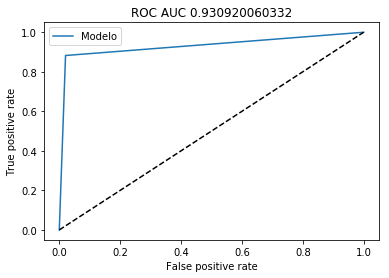


--------------------------------------------------------


### --------------------------Testing Set---------------------------

The recall for this model is: 0.871166


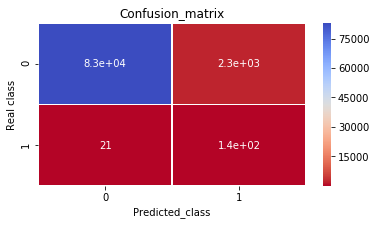


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      0.97      0.99     85280
          1       0.06      0.87      0.11       163

avg / total       1.00      0.97      0.98     85443


----------ROC Curve------------------------------------


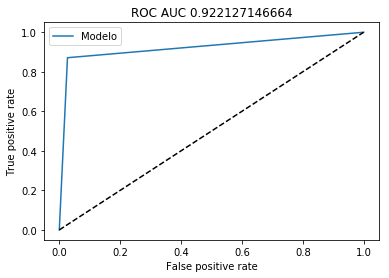


--------------------------------------------------------


### ---------------------------------------------------------------

## ----------------------Decision Tree ------------------------

### ----------------------Validation Set------------------------

### The model classification for 2 proportion


Length of training data: 690
Length of test data: 297
The recall for this model is: 0.905263


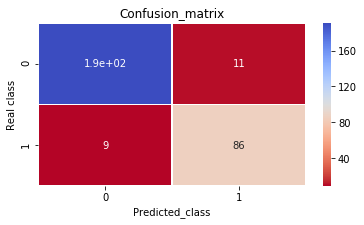


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.95      0.95      0.95       202
          1       0.89      0.91      0.90        95

avg / total       0.93      0.93      0.93       297


----------ROC Curve------------------------------------


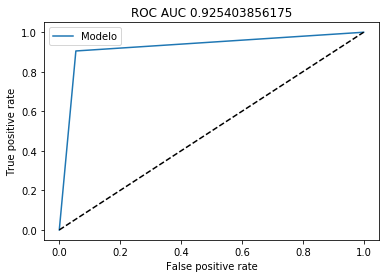


--------------------------------------------------------


### --------------------------Testing Set---------------------------

The recall for this model is: 0.889571


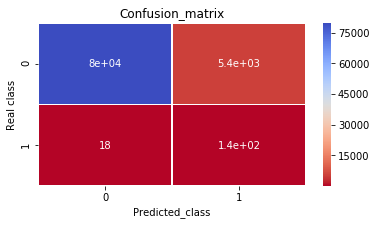


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      0.94      0.97     85280
          1       0.03      0.89      0.05       163

avg / total       1.00      0.94      0.97     85443


----------ROC Curve------------------------------------


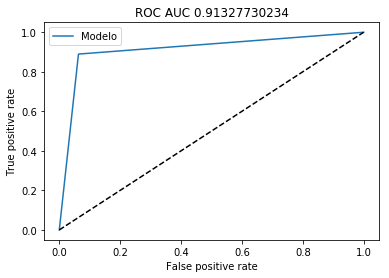


--------------------------------------------------------


### ---------------------------------------------------------------

# The undersample data for 3 proportion


The normal transacation proportion is : 0.750000
The fraud transacation proportion is : 0.250000


## ----------------------Logistic Regression------------------------

### ----------------------Validation Set------------------------

### The model classification for 3 proportion


Length of training data: 921
Length of test data: 395
The recall for this model is: 0.894231


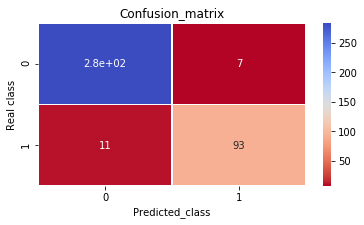


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.96      0.98      0.97       291
          1       0.93      0.89      0.91       104

avg / total       0.95      0.95      0.95       395


----------ROC Curve------------------------------------


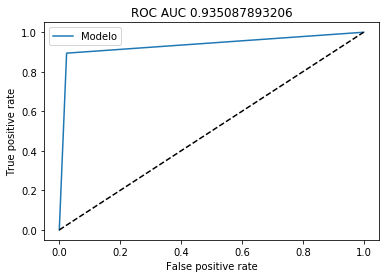


--------------------------------------------------------


### --------------------------Testing Set---------------------------

The recall for this model is: 0.871166


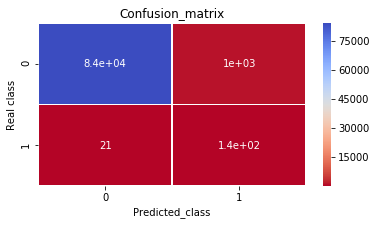


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      0.99      0.99     85280
          1       0.12      0.87      0.22       163

avg / total       1.00      0.99      0.99     85443


----------ROC Curve------------------------------------


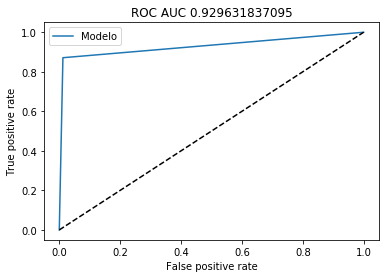


--------------------------------------------------------


### ---------------------------------------------------------------

## ----------------------Decision Tree ------------------------

### ----------------------Validation Set------------------------

### The model classification for 3 proportion


Length of training data: 921
Length of test data: 395
The recall for this model is: 0.873786


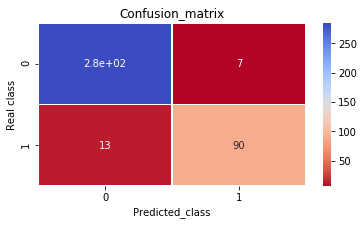


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.96      0.98      0.97       292
          1       0.93      0.87      0.90       103

avg / total       0.95      0.95      0.95       395


----------ROC Curve------------------------------------


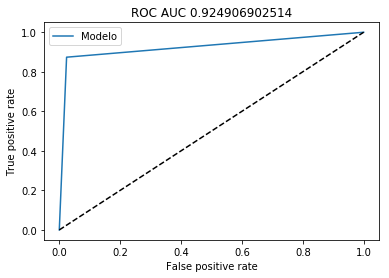


--------------------------------------------------------


### --------------------------Testing Set---------------------------

The recall for this model is: 0.895706


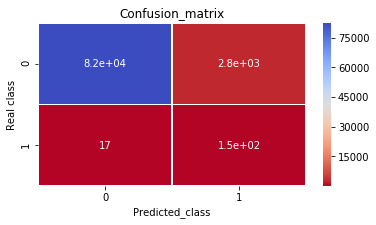


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      0.97      0.98     85280
          1       0.05      0.90      0.09       163

avg / total       1.00      0.97      0.98     85443


----------ROC Curve------------------------------------


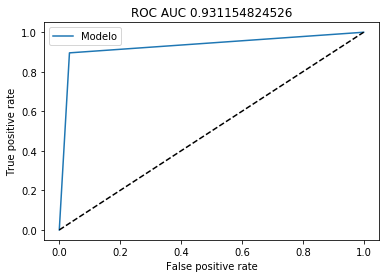


--------------------------------------------------------


### ---------------------------------------------------------------

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn import tree

from IPython.display import display, Markdown, Latex
 

from sklearn.metrics import confusion_matrix,recall_score,precision_recall_curve,auc,roc_curve,roc_auc_score,classification_report
x_tr,x_ts,y_tr,y_ts = data_prepration(dt)
x_tr["Class"] = y_tr["Class"]
x_tr = x_tr.reset_index(drop=True)

results_logistic = {}
results_tree = {}
for i in range(1,4):
    display(Markdown("# The undersample data for " + str(i) + " proportion\n"))
    Undersample_data = undersample(x_tr,i)
    
    display(Markdown("## ----------------------Logistic Regression------------------------"))

    
    display(Markdown("### ----------------------Validation Set------------------------"))
    display(Markdown("### The model classification for " + str(i) + " proportion\n"))
    under_x,under_xt,under_yx,under_yxt=data_prepration(Undersample_data)
    clf=LogisticRegression()
    score_val = model(clf,under_x,under_xt,under_yx,under_yxt)
    display(Markdown("### --------------------------Testing Set---------------------------"))
    score = model(clf,under_x,x_ts,under_yx,y_ts)
    results_logistic[i] ={"validation":score_val, "testing":score}
    display(Markdown("### ---------------------------------------------------------------"))
    
    display(Markdown("## ----------------------Decision Tree ------------------------"))

    
    display(Markdown("### ----------------------Validation Set------------------------"))
    display(Markdown("### The model classification for " + str(i) + " proportion\n"))
    under_x,under_xt,under_yx,under_yxt=data_prepration(Undersample_data)
    clf = tree.DecisionTreeClassifier()
    score_val = model(clf,under_x,under_xt,under_yx,under_yxt)
    display(Markdown("### --------------------------Testing Set---------------------------"))
    score = model(clf,under_x,x_ts,under_yx,y_ts)
    results_tree[i] = {"validation":score_val, "testing":score}
    display(Markdown("### ---------------------------------------------------------------"))

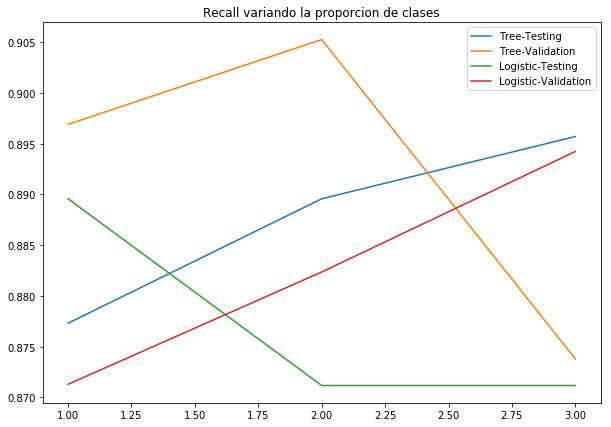

In [31]:
logistic = pd.DataFrame(results_logistic)
tree = pd.DataFrame(results_tree)
tree.index = ["Tree-Testing", "Tree-Validation"]
logistic.index = ["Logistic-Testing", "Logistic-Validation"]
plt.figure(figsize=(10,7))
tree = tree.transpose()
logistic = logistic.transpose()
plt.title("Recall variando la proporcion de clases")
plt.plot(tree.iloc[:,0], label=tree.columns[0])
plt.plot(tree.iloc[:,1], label=tree.columns[1])
plt.plot(logistic.iloc[:,0], label=logistic.columns[0])
plt.plot(logistic.iloc[:,1], label=logistic.columns[1])
plt.legend()

Se oberva que ambos métodos empiezan a sufrir al desbalancear una clase, en el caso de logistic regression obtiene mejores resultados al predecir el conjunto de testing, pero hay que tener en cuenta que no se están trabajando con los parámetros del árbol de decisión (`min_samples_split`, `max_depth`, etc.) 

<div id='3g' />
##### (g) Vuelva a realizar los puntos (e) y (f), esta vez utilizando OverSampling y SMOTE (Hint: Para SMOTE usted puede apoyarse de la librería imblearn).

La técnica de Oversampling a diferencia de undersampling busca aumentar la cantidad de ejemplos de la case minoritaria para llegar a un problema balanceado.

Existen varias formas de realizar esta técnica, la más sensilla es tomar de forma aleatoria $N_{diff}$ valores de la clase minoritaria donde $N_{diff} = N_{Mayoritaria} - N_{Minoritaria}$ luego de realizar el muestreo sobre los ejemplos de la clase minoritaria se obtiene un dataset más grande con una proporción de datos mayor de la clase minoritaria.

Otra técnica de oversampling es denominada SMOTE (Synthetic Minority Over-sampling) que modela los datos de la clase minoriataria y luego realiza un muestreo sobre ese modelo, esta técnica es más compleja pero puede obtener mejores resultados, en este caso SMOTE utiliza KNN y SVM para realizar este modelo.

En ambos casos y a diferencia de undersampling el resultado de la técnica entrega un conjunto de datos mayor al original, por lo que es útil para los modelos que tienen que ajustar múchos parámetros.

In [115]:
def oversampling(data,times):
    n,_ = data.shape
    difference = int((np.sum(data.Class == 0) - np.sum(data.Class == 1))/float(times))

    oversampled = data[data.Class==1].sample(difference, replace=True)
    oversampled_result =  pd.concat([data,oversampled])
    new_n,_ = oversampled_result.shape
    normal =  float(np.sum(oversampled_result.Class == 0)) /new_n
    print "The normal transacation proportion is : %f"%normal
    fraud =  float(np.sum(oversampled_result.Class == 1)) /new_n
    print "The fraud transacation proportion is : %f"%fraud
    return oversampled_result

Length of training data: 199364
Length of test data: 85443


# The undersample data for 1 proportion


The normal transacation proportion is : 0.500000
The fraud transacation proportion is : 0.500000


## ----------------------Logistic Regression------------------------

### ----------------------Validation Set------------------------

### The model classification for 1 proportion


Length of training data: 278626
Length of test data: 119412
The recall for this model is: 0.910147


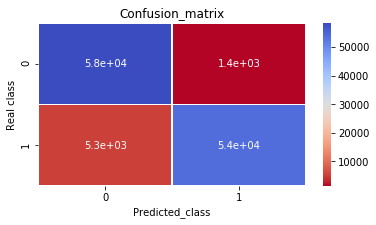


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.92      0.98      0.95     59904
          1       0.97      0.91      0.94     59508

avg / total       0.95      0.94      0.94    119412


----------ROC Curve------------------------------------


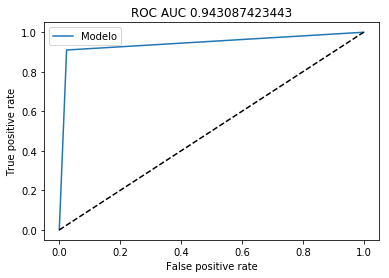


--------------------------------------------------------


### --------------------------Testing Set---------------------------

The recall for this model is: 0.918367


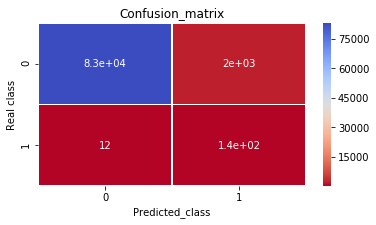


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      0.98      0.99     85296
          1       0.06      0.92      0.12       147

avg / total       1.00      0.98      0.99     85443


----------ROC Curve------------------------------------


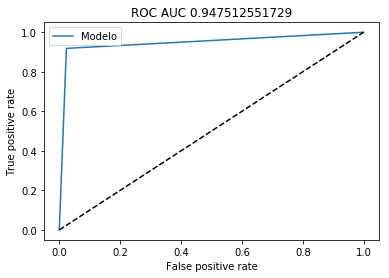


--------------------------------------------------------


### ---------------------------------------------------------------

## ----------------------Decision Tree ------------------------

### ----------------------Validation Set------------------------

### The model classification for 1 proportion


Length of training data: 278626
Length of test data: 119412
The recall for this model is: 1.000000


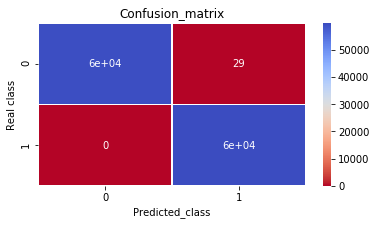


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     59530
          1       1.00      1.00      1.00     59882

avg / total       1.00      1.00      1.00    119412


----------ROC Curve------------------------------------


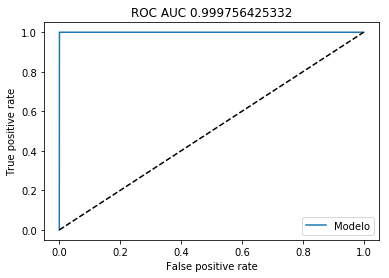


--------------------------------------------------------


### --------------------------Testing Set---------------------------

The recall for this model is: 0.782313


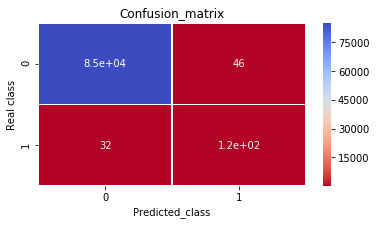


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85296
          1       0.71      0.78      0.75       147

avg / total       1.00      1.00      1.00     85443


----------ROC Curve------------------------------------


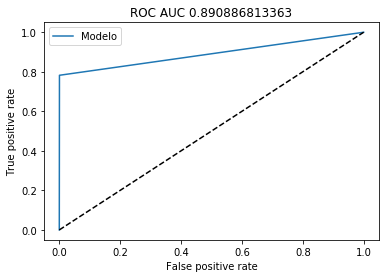


--------------------------------------------------------


### ---------------------------------------------------------------

# The undersample data for 2 proportion


The normal transacation proportion is : 0.666282
The fraud transacation proportion is : 0.333718


## ----------------------Logistic Regression------------------------

### ----------------------Validation Set------------------------

### The model classification for 2 proportion


Length of training data: 209090
Length of test data: 89611
The recall for this model is: 0.886770


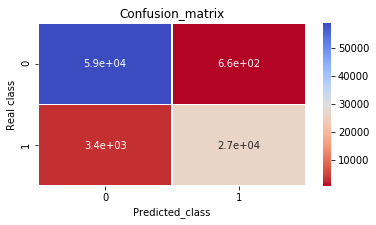


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.95      0.99      0.97     59672
          1       0.98      0.89      0.93     29939

avg / total       0.96      0.95      0.95     89611


----------ROC Curve------------------------------------


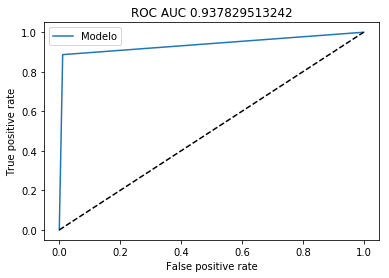


--------------------------------------------------------


### --------------------------Testing Set---------------------------

The recall for this model is: 0.918367


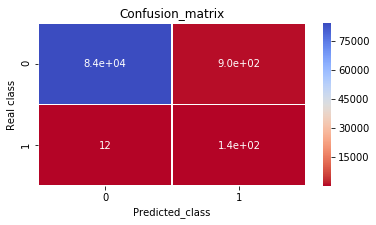


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      0.99      0.99     85296
          1       0.13      0.92      0.23       147

avg / total       1.00      0.99      0.99     85443


----------ROC Curve------------------------------------


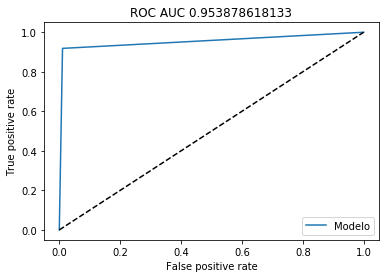


--------------------------------------------------------


### ---------------------------------------------------------------

## ----------------------Decision Tree ------------------------

### ----------------------Validation Set------------------------

### The model classification for 2 proportion


Length of training data: 209090
Length of test data: 89611
The recall for this model is: 1.000000


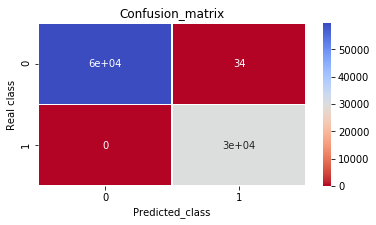


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     59736
          1       1.00      1.00      1.00     29875

avg / total       1.00      1.00      1.00     89611


----------ROC Curve------------------------------------


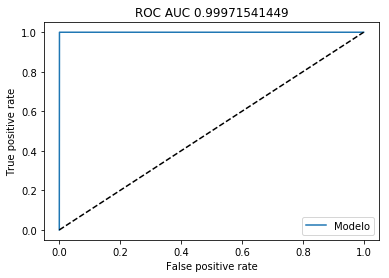


--------------------------------------------------------


### --------------------------Testing Set---------------------------

The recall for this model is: 0.809524


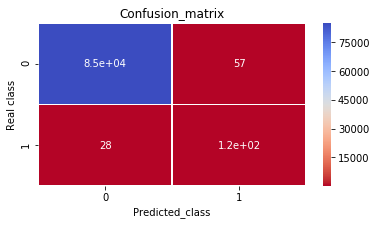


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85296
          1       0.68      0.81      0.74       147

avg / total       1.00      1.00      1.00     85443


----------ROC Curve------------------------------------


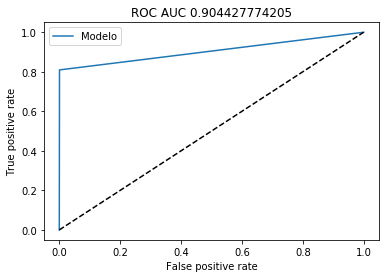


--------------------------------------------------------


### ---------------------------------------------------------------

# The undersample data for 3 proportion


The normal transacation proportion is : 0.749352
The fraud transacation proportion is : 0.250648


## ----------------------Logistic Regression------------------------

### ----------------------Validation Set------------------------

### The model classification for 3 proportion


Length of training data: 185911
Length of test data: 79677
The recall for this model is: 0.878911


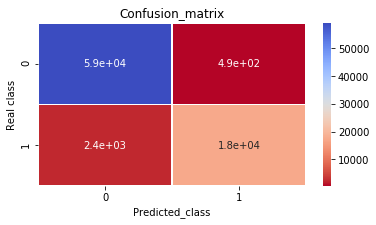


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.96      0.99      0.98     59700
          1       0.97      0.88      0.92     19977

avg / total       0.96      0.96      0.96     79677


----------ROC Curve------------------------------------


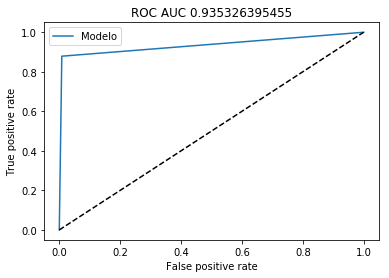


--------------------------------------------------------


### --------------------------Testing Set---------------------------

The recall for this model is: 0.897959


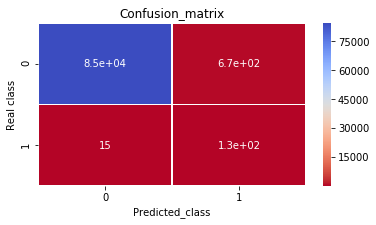


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      0.99      1.00     85296
          1       0.16      0.90      0.28       147

avg / total       1.00      0.99      0.99     85443


----------ROC Curve------------------------------------


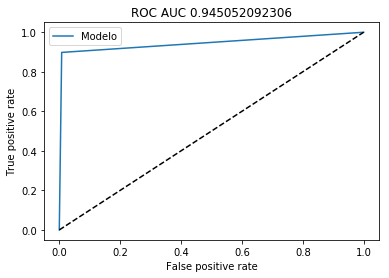


--------------------------------------------------------


### ---------------------------------------------------------------

## ----------------------Decision Tree ------------------------

### ----------------------Validation Set------------------------

### The model classification for 3 proportion


Length of training data: 185911
Length of test data: 79677
The recall for this model is: 1.000000


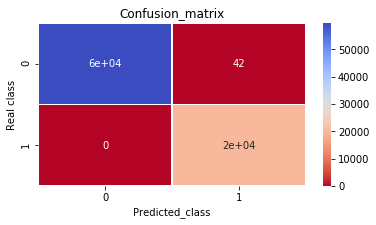


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     59804
          1       1.00      1.00      1.00     19873

avg / total       1.00      1.00      1.00     79677


----------ROC Curve------------------------------------


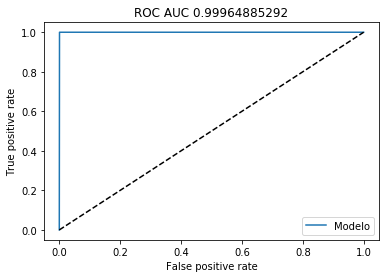


--------------------------------------------------------


### --------------------------Testing Set---------------------------

The recall for this model is: 0.823129


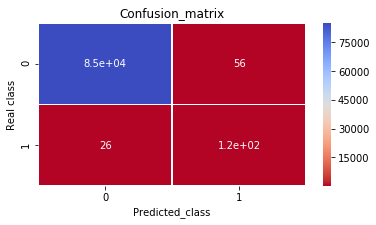


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85296
          1       0.68      0.82      0.75       147

avg / total       1.00      1.00      1.00     85443


----------ROC Curve------------------------------------


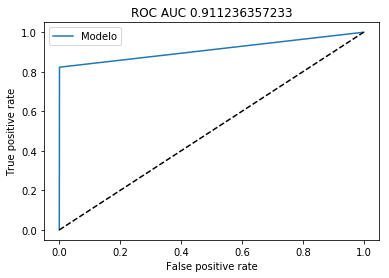


--------------------------------------------------------


### ---------------------------------------------------------------

In [113]:

from sklearn.linear_model import LogisticRegression
from sklearn import tree

from IPython.display import display, Markdown, Latex
 

from sklearn.metrics import confusion_matrix,recall_score,precision_recall_curve,auc,roc_curve,roc_auc_score,classification_report
x_tr,x_ts,y_tr,y_ts = data_prepration(dt)
x_tr["Class"] = y_tr["Class"]
x_tr = x_tr.reset_index(drop=True)

results_logistic = {}
results_tree = {}
for i in range(1,4):
    display(Markdown("# The over data for " + str(i) + " proportion\n"))
    oversampled_data = oversampling(x_tr,i)
    
    display(Markdown("## ----------------------Logistic Regression------------------------"))

    
    display(Markdown("### ----------------------Validation Set------------------------"))
    display(Markdown("### The model classification for " + str(i) + " proportion\n"))
    over_x,over_xt,over_yx,over_yxt=data_prepration(oversampled_data)
    clf=LogisticRegression()
    score_val = model(clf,over_x,over_xt,over_yx,over_yxt)
    display(Markdown("### --------------------------Testing Set---------------------------"))
    score = model(clf,over_x,x_ts,over_yx,y_ts)
    results_logistic[i] ={"validation":score_val, "testing":score}
    display(Markdown("### ---------------------------------------------------------------"))
    
    display(Markdown("## ----------------------Decision Tree ------------------------"))

    
    display(Markdown("### ----------------------Validation Set------------------------"))
    display(Markdown("### The model classification for " + str(i) + " proportion\n"))
    over_x,over_xt,over_yx,over_yxt=data_prepration(oversampled_data)
    clf = tree.DecisionTreeClassifier()
    score_val = model(clf,over_x,over_xt,over_yx,over_yxt)
    display(Markdown("### --------------------------Testing Set---------------------------"))
    score = model(clf,over_x,x_ts,over_yx,y_ts)
    results_tree[i] = {"validation":score_val, "testing":score}
    display(Markdown("### ---------------------------------------------------------------"))


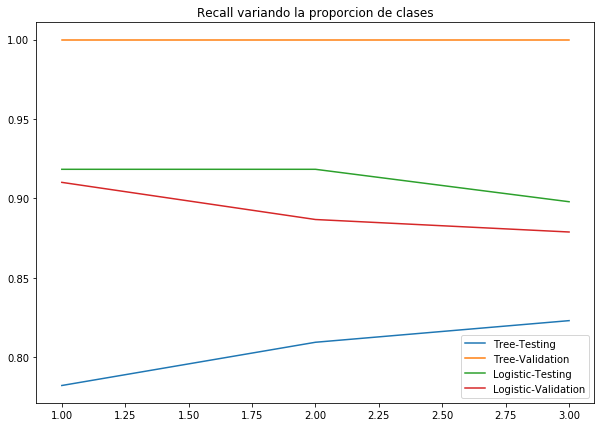

In [114]:
logistic = pd.DataFrame(results_logistic)
tree = pd.DataFrame(results_tree)
tree.index = ["Tree-Testing", "Tree-Validation"]
logistic.index = ["Logistic-Testing", "Logistic-Validation"]
plt.figure(figsize=(10,7))
tree = tree.transpose()
logistic = logistic.transpose()
plt.title("Recall variando la proporcion de clases")
plt.plot(tree.iloc[:,0], label=tree.columns[0])
plt.plot(tree.iloc[:,1], label=tree.columns[1])
plt.plot(logistic.iloc[:,0], label=logistic.columns[0])
plt.plot(logistic.iloc[:,1], label=logistic.columns[1])
plt.legend()

En este caso se puede observar al que con Undersampling se obtienen buenos resultados pero a medida que aumenta la proporcion entre las clases se observa que el Recall disminuye.

Además en este caso se observa de mayor manera el overfitting que realiza el árbol de decisión de `Scikit-Learn` con los parámetros por defecto se tendría que realizar una poda o limitar la altura del árbol.

The oversampled data with SMOTE for proportion


----------------------Validation Set------------------------
Length of training data: 278626
Length of test data: 119412
The recall for this model is: 0.882353


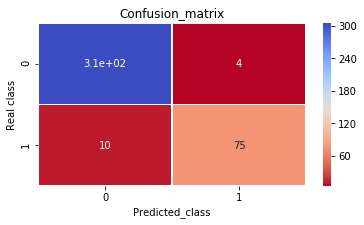


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.97      0.99      0.98       310
          1       0.95      0.88      0.91        85

avg / total       0.96      0.96      0.96       395


----------ROC Curve------------------------------------


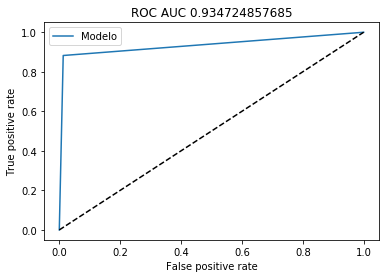


--------------------------------------------------------
--------------------------Testing Set---------------------------
The recall for this model is: 0.925170


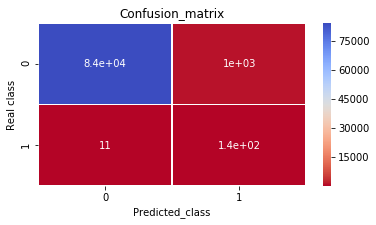


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      0.99      0.99     85296
          1       0.12      0.93      0.21       147

avg / total       1.00      0.99      0.99     85443


----------ROC Curve------------------------------------


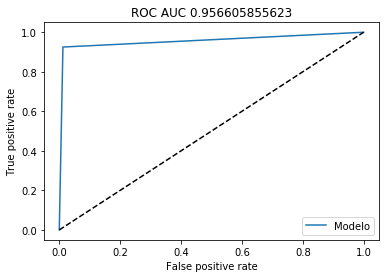


--------------------------------------------------------
---------------------------------------------------------------
The recall for this model is: 0.870588


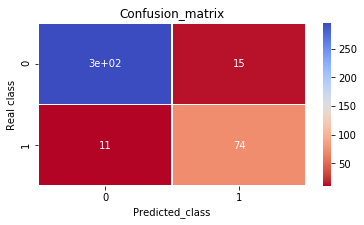


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.96      0.95      0.96       310
          1       0.83      0.87      0.85        85

avg / total       0.94      0.93      0.93       395


----------ROC Curve------------------------------------


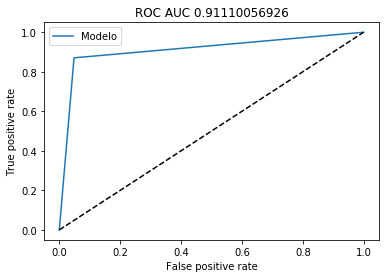


--------------------------------------------------------
--------------------------Testing Set---------------------------
The recall for this model is: 0.945578


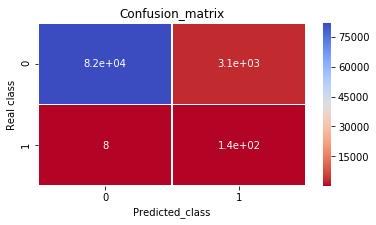


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      0.96      0.98     85296
          1       0.04      0.95      0.08       147

avg / total       1.00      0.96      0.98     85443


----------ROC Curve------------------------------------


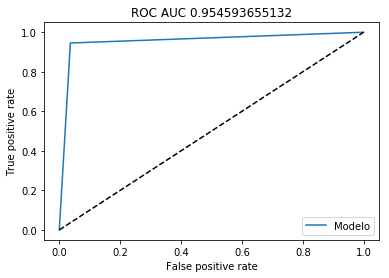


--------------------------------------------------------
---------------------------------------------------------------


In [131]:
from imblearn.over_sampling import SMOTE
from sklearn import tree

x_tr2 = x_tr.drop("Class",axis=1)

results_logistic = {}
results_tree = {}

print "The oversampled data with SMOTE for proportion\n"
os = SMOTE(random_state=0)
oversampled_data,os_y=os.fit_sample(x_tr2,y_tr.values.reshape(-1))
oversampled_data = pd.DataFrame(oversampled_data)
oversampled_data.columns = x_tr2.columns
oversampled_data["Class"] = os_y

print "\n----------------------Validation Set------------------------"
over_x,over_xt,over_yx,over_yxt=data_prepration(oversampled_data)
clf=LogisticRegression()
score_val = model(clf,under_x,under_xt,under_yx,under_yxt)
print "--------------------------Testing Set---------------------------"
score = model(clf,under_x,x_ts,under_yx,y_ts)
print "---------------------------------------------------------------"
results_logistic["SMOTE"] = {"Validation": score_val,"Testing":score}


clf=tree.DecisionTreeClassifier()
score_val = model(clf,under_x,under_xt,under_yx,under_yxt)
print "--------------------------Testing Set---------------------------"
score = model(clf,under_x,x_ts,under_yx,y_ts)
print "---------------------------------------------------------------"
results_tree["SMOTE"] = {"Validation": score_val,"Testing":score}


In [132]:
pd.DataFrame(results_logistic)

,SMOTE
Testing,0.925170
Validation,0.882353


In [133]:
pd.DataFrame(results_tree)

,SMOTE
Testing,0.945578
Validation,0.870588


Utilizando SMOTE se obtienen resultados similares al Random Oversampling que se utlizó anteriormente